<a href="https://colab.research.google.com/github/Jorge-Alvarez-23/Data-Science-III_Coder/blob/main/proy_final_alvarezjorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion


In [ ]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#----------------------------------------------
import chardet
import requests
import csv

# Lectura

In [ ]:
# Como sabemos que encoding tiene un archivo:



def detectar_encoding_csv_url(url):
    """
    Detecta la codificación de un archivo CSV a partir de una URL.

    Args:
        url (str): La URL del archivo CSV.

    Returns:
        str: La codificación detectada (ej. 'utf-8', 'latin-1'), o None si no se pudo detectar.
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Lanza una excepción para errores HTTP
        enc = chardet.detect(response.content[:1024])  # Lee los primeros 1024 bytes
        return enc['encoding']
    except requests.exceptions.RequestException as e:
        print(f"Error al descargar el archivo: {e}")
        return None
    except Exception as e:
        print(f"Error al detectar la codificación: {e}")
        return None



In [ ]:
'''# Bloque de codigo encargado de cargar los datos a partir de una url de github y ponerlos en un dataframe


# URL del archivo de texto
url = 'https://github.com/Jorge-Alvarez-23/Data-Science-III_Coder/raw/main/spam.csv'

# Hacer la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Leer el contenido CSV directamente en un DataFrame
    datos = StringIO(response.text)  # Convertir el texto a un objeto similar a un archivo
    df = pd.read_csv(datos)  # Leer el contenido en un DataFrame

    # Establecer opción para mostrar todas las columnas
    pd.set_option('display.max_columns', None)  # Muestra todas las columnas
    pd.set_option('display.expand_frame_repr', False)  # Evita que se divida el DataFrame en múltiples líneas

    # Mostrar el DataFrame
    display(df.sample(10))
else:
    print(f'Error al acceder al archivo: {response.status_code}')'''

"# Bloque de codigo encargado de cargar los datos a partir de una url de github y ponerlos en un dataframe\n\n\n# URL del archivo de texto\nurl = 'https://github.com/Jorge-Alvarez-23/Data-Science-III_Coder/raw/main/spam.csv'\n\n# Hacer la solicitud GET para obtener el contenido del archivo\nresponse = requests.get(url)\n\n# Verificar que la solicitud fue exitosa\nif response.status_code == 200:\n    # Leer el contenido CSV directamente en un DataFrame\n    datos = StringIO(response.text)  # Convertir el texto a un objeto similar a un archivo\n    df = pd.read_csv(datos)  # Leer el contenido en un DataFrame\n\n    # Establecer opción para mostrar todas las columnas\n    pd.set_option('display.max_columns', None)  # Muestra todas las columnas\n    pd.set_option('display.expand_frame_repr', False)  # Evita que se divida el DataFrame en múltiples líneas\n\n    # Mostrar el DataFrame\n    display(df.sample(10))\nelse:\n    print(f'Error al acceder al archivo: {response.status_code}')"

In [ ]:

import gdown
# OPCIÓN 2: Utilizamos gdown para que cada usuario que acceda a la notebook acceda a los datos sin necesidad de subir el dataset manualmente a su dispositivo.

url = "https://github.com/Jorge-Alvarez-23/Data-Science-III_Coder/raw/main/spam.csv"  # Reemplaza con tu URL
encoding = detectar_encoding_csv_url(url)

# Descargamos el archivo con gdown
gdown.download(url, 'Spam.csv', quiet=False)

# Leemos el archivo CSV descargado
df = pd.read_csv('Spam.csv', encoding=encoding)

# Mostramos las primeras filas

print(df.head(10))

# Mostrar la codificación detectada
print("\n---")
print(f"La codificación detectada es: {encoding}")

Downloading...
From: https://github.com/Jorge-Alvarez-23/Data-Science-III_Coder/raw/main/spam.csv
To: /content/Spam.csv
100%|██████████| 504k/504k [00:00<00:00, 6.60MB/s]

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

In [ ]:
# Reduciremos el df utilizando solo las columnas que nos interesan.

df = df[["v1", "v2"]]
df = df.rename(columns={"v1": "Category", "v2": "Email Text"})

In [ ]:
# Visualizamos algunas de las reviews.

# La número 49
print(df.loc[50, 'Email Text'])
print("\n" + "-"*80 + "\n")  # línea separadora


# La número 300
print(df.loc[301, 'Email Text'])
print("\n" + "-"*80 + "\n")  # línea separadora


# La número 5000
print(df.loc[5001, 'Email Text'])
print("\n" + "-"*80 + "\n")  # línea separadora


What you thinked about me. First time you saw me in class.

--------------------------------------------------------------------------------

Shit that is really shocking and scary, cant imagine for a second. Def up for night out. Do u think there is somewhere i could crash for night, save on taxi?

--------------------------------------------------------------------------------

You still around? Looking to pick up later

--------------------------------------------------------------------------------



In [ ]:
df.head(10)

,Category,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.isnull().sum()

,0
Category,0
Email Text,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Email Text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df["length"] = df["Email Text"].apply(len)
df.sort_values(by='length', ascending=False).head(10)

,Category,Email Text,length
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2847,ham,Sad story of a Man - Last week was my b'day. M...,588
2157,ham,Sad story of a Man - Last week was my b'day. M...,588
2379,ham,"Good evening Sir, hope you are having a nice d...",482
3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1512,ham,"Hey sweet, I was wondering when you had a mome...",458
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,450


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

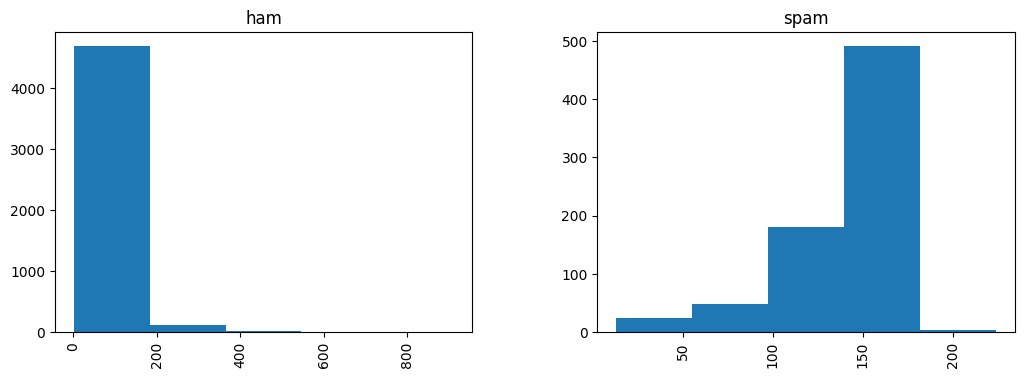

In [ ]:
df.hist(column = 'length', by ='Category',figsize=(12,4), bins = 5)

Nótese que a través del histograma hemos podido descubrir que los mensajes de spam tienden a tener más caracteres

# Normalizamos los valores pasando todo el texto a minúscula.

In [ ]:
#  ¿Qué hace .lower()? Convierte todo el texto a minúsculas.

# No necesitás importar ninguna librería para usar .lower(), ya que es un método incorporado en los objetos de tipo str en Python.
# Esto significa que cualquier texto (cadena de caracteres) puede convertirse a minúsculas directamente con .lower().
#  Es útil para normalizar texto antes de analizarlo o procesarlo.

df['Email Text_lower'] = df['Email Text'].apply(lambda text: text.lower())


In [ ]:
# previsualizamos ambas columnas de review para obtener una comparativa.
df

,Category,Email Text,length,Email Text_lower
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,37,will ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"pity, * was in mood for that. so...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitching but i acted like i'd...


# Quitamos signos de puntuación

In [ ]:
import re

# Definir una función que remueva los signos de puntuación usando re
def remove_punctuation(text):
    # Expresión regular para reemplazar cualquier signo de puntuación o símbolo no alfanumérico
     return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Aplicar la función a la columna 'review_lower'
df['Email Text_puntuacion'] = df['Email Text_lower'].apply(remove_punctuation)

In [ ]:
# Previsualizamos algunos ejemplos
df.head(50)

,Category,Email Text,length,Email Text_lower,Email Text_puntuacion
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...
6,ham,Even my brother is not like to speak with me. ...,77,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...
8,spam,WINNER!! As a valued network customer you have...,158,winner!! as a valued network customer you have...,winner as a valued network customer you have b...
9,spam,Had your mobile 11 months or more? U R entitle...,154,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...


# Tokenización
## Definición:
La tokenización consiste en dividir un texto en unidades pequeñas llamadas tokens, que generalmente son palabras, aunque también pueden ser frases, oraciones o caracteres, dependiendo del contexto.

## Ejemplo:
Texto original: "Me encantó la Big Mac de McDonald's."

Tokens: ["Me", "encantó", "la", "Big", "Mac", "de", "McDonald", "'s", "."]

## ¿Para qué sirve?
Es un paso inicial obligatorio en casi cualquier tarea de procesamiento de lenguaje natural (NLP), ya que permite trabajar con cada palabra por separado: contar frecuencias, aplicar modelos, buscar significados, etc.


In [ ]:
# Importamos las librerías necesarias
import nltk

nltk.download('punkt')  # Descargamos el paquete de tokenización de NLTK
nltk.download('punkt_tab')  # Descargamos el paquete de tokenización de NLTK
from nltk.tokenize import word_tokenize # Desde el módulo nltk.tokenize, quiero importar solo la función word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Tokenizamos los valores de la columna 'review'
df['Email Text_tokenizado'] = df['Email Text_puntuacion'].apply(word_tokenize)


In [ ]:
# Configuramos pandas para mostrar el contenido completo de las columnas
pd.set_option('display.max_colwidth', None)



In [ ]:
# Mostramos las primeras filas con la columna original y de la columna tokenizada
df[['Email Text', 'Email Text_tokenizado']].head()

,Email Text,Email Text_tokenizado
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]"
1,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
3,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,"Nah I don't think he goes to usf, he lives around here though","[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


In [ ]:
# Restauramos la configuración predeterminada de pandas para el ancho de las columnas
pd.reset_option('display.max_colwidth')

# Remover Stopwords
## Definición:
El proceso de remover stopwords consiste en eliminar las palabras vacías que no aportan un valor significativo al análisis del texto. Estas palabras incluyen artículos, preposiciones, conjunciones y otros términos comunes que suelen ser irrelevantes para tareas de procesamiento de texto.

## Ejemplo:
Texto original: "El perro corre rápidamente hacia el parque."

Tokens: ["El", "perro", "corre", "rápidamente", "hacia", "el", "parque"]

Después de remover las stopwords ("El", "hacia", "el"):

Tokens sin stopwords: ["perro", "corre", "rápidamente", "parque"]

## ¿Para qué sirve?
Remover stopwords ayuda a reducir el ruido en el texto y mejora la precisión en tareas como el análisis de sentimientos, clasificación de texto y búsqueda de información. Al eliminar palabras que no aportan mucho significado, se hace más fácil encontrar patrones útiles en el texto.

In [ ]:
# Previsualizamos algunas stopwords previstas en la librería.

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Obtenemos el listado de stopwords en español
stopwords_es = stopwords.words('spanish')

# Mostramos las primeras 20
print(stopwords_es[:20])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Previsualizamos algunas stopwords previstas en la librería.

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Obtenemos el listado de stopwords en español
stopwords_eng = stopwords.words('english')

# Mostramos las primeras 20
print(stopwords_eng[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtro Stopwords

In [ ]:
# Importamos stopwords de NLTK (Pueden importarse tanto para español como para inglés)
nltk.download('stopwords') # Descargamos el paquete de stopwords de NLTK para poder usarlas en el código
from nltk.corpus import stopwords # Importamos el módulo de stopwords desde NLTK, que contiene listas de palabras vacías

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english')) # Creamos un conjunto de stopwords en inglés usando NLTK

# Función para eliminar stopwords de los tokens
# Aplicamos una función lambda a cada fila de la columna 'review_tokenizado'
df['Email Text_tokenizado_sin_stopwords'] = df['Email Text_tokenizado'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
    # La función lambda toma cada lista de tokens (palabras tokenizadas de la reseña),
    # y devuelve una nueva lista donde solo quedan las palabras que no están en la lista de stopwords.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming
## Definición:
Stemming es el proceso de reducir una palabra a su raíz o forma base eliminando sufijos, prefijos o terminaciones. El objetivo es agrupar diferentes formas de una palabra (como variaciones gramaticales) bajo una forma común.

## Ejemplo:
Texto original: "corriendo", "corre", "corrió"

Después de aplicar stemming:

Palabras reducidas: ["corr", "corr", "corr"]

## ¿Para qué sirve?
El stemming ayuda a reducir la variabilidad de las palabras en un texto y facilita su análisis. Es útil en tareas como la clasificación de texto y la búsqueda de información, donde la variación gramatical no es relevante. Sin embargo, puede generar raíces incompletas o poco precisas.

In [ ]:
# Importar el PorterStemmer de nltk
from nltk.stem import PorterStemmer

# Inicializar el stemmer
stemmer = PorterStemmer()

# Aplicar stemming a la columna 'review_tokenizado_sin_stopwords'
df['Email Text_stemming'] = df['Email Text_tokenizado_sin_stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])


# Previsualizamos el resultado final

In [ ]:
# Previsualizamos las 5 versiones de la columna review.
df.head(15)

,Category,Email Text,length,Email Text_lower,Email Text_puntuacion,Email Text_tokenizado,Email Text_tokenizado_sin_stopwords,Email Text_stemming
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,freemsg hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darl, 3, week, word, back, id, ..."
6,ham,Even my brother is not like to speak with me. ...,77,even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,as per your request 'melle melle (oru minnamin...,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint..."
8,spam,WINNER!! As a valued network customer you have...,158,winner!! as a valued network customer you have...,winner as a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,had your mobile 11 months or more? u r entitle...,had your mobile 11 months or more u r entitled...,"[had, your, mobile, 11, months, or, more, u, r...","[mobile, 11, months, u, r, entitled, update, l...","[mobil, 11, month, u, r, entitl, updat, latest..."


# Obtenemos el listado de las palabras con mayor frecuencia.

In [ ]:
# Importamos Counter
from collections import Counter

# Unimos todos los tokens lematizados en una sola lista
tokens_stemming = [token for tokens_list in df['Email Text_stemming'] for token in tokens_list]

# Contamos la frecuencia de cada palabra
frecuencia_palabras_stemming = Counter(tokens_stemming)

# Mostramos las 20 palabras más comunes
frecuencia_palabras_stemming.most_common(20)

[('u', 1119),
 ('call', 653),
 ('2', 478),
 ('im', 472),
 ('go', 449),
 ('get', 447),
 ('ur', 384),
 ('come', 297),
 ('dont', 290),
 ('4', 287),
 ('ok', 277),
 ('ltgt', 276),
 ('free', 275),
 ('know', 270),
 ('like', 255),
 ('got', 250),
 ('love', 244),
 ('want', 243),
 ('ill', 243),
 ('day', 241)]

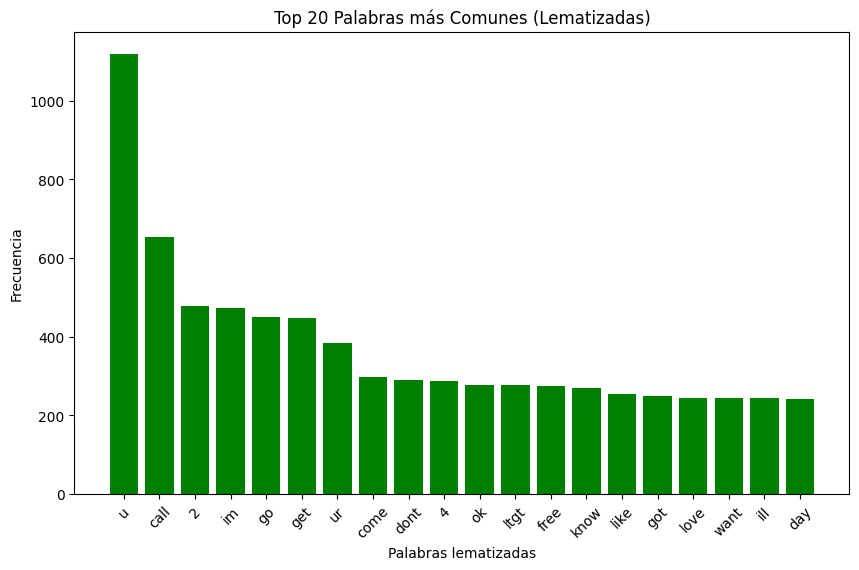

In [ ]:
# Importamos matplotlib para la visualización
import matplotlib.pyplot as plt

# Obtenemos las 20 palabras más comunes y sus frecuencias
palabras_stem, frecuencias_stem = zip(*frecuencia_palabras_stemming.most_common(20))

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
plt.bar(palabras_stem, frecuencias_stem, color='green')

# Añadimos etiquetas y título
plt.xlabel('Palabras lematizadas')
plt.ylabel('Frecuencia')
plt.title('Top 20 Palabras más Comunes (Lematizadas)')

# Rotamos las etiquetas del eje X para que se lean mejor
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()

# Wordcloud sin quitar Stopwords.

In [ ]:
# Importamos las librerías necesarias

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
df.head(5)  #BORRAR ESTA LINEA

,Category,Email Text,length,Email Text_lower,Email Text_puntuacion,Email Text_tokenizado,Email Text_tokenizado_sin_stopwords,Email Text_stemming
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


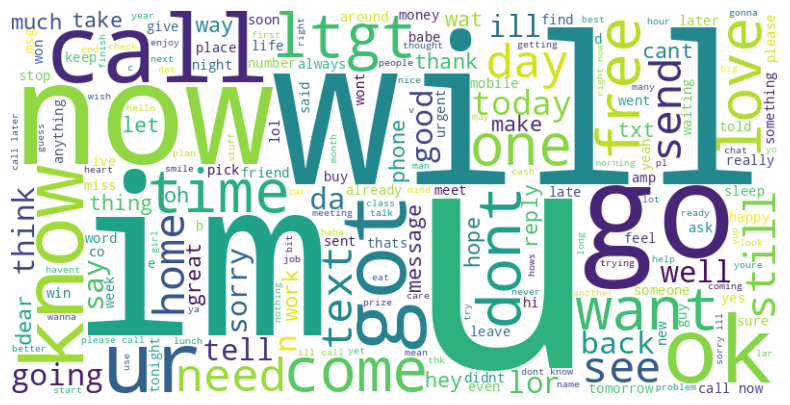

In [ ]:
# Unir todo el texto de la columna 'Email Text_tokenizado'

#Esto es necesario porque la WordCloud genera la nube de palabras a partir de
# una única cadena de texto, y no puede procesar una columna de DataFrame directamente.

text = ' '.join(df['Email Text_puntuacion'])

# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Crea un objeto WordCloud con un ancho de 800 píxeles, altura de 400, y fondo blanco.
# El método 'generate' crea la nube de palabras a partir del texto dado.

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
# Crea una figura de tamaño 10x5 pulgadas para la visualización de la nube.

plt.imshow(wordcloud, interpolation='bilinear')
# Muestra la nube de palabras en la figura, usando interpolación bilineal para suavizarla.

plt.axis('off')
# Oculta los ejes de la figura para una mejor visualización.

plt.show()
# Muestra la figura en pantalla.

# Wordcloud removiendo stopwords

In [ ]:
# Importamos las stopwords de la biblioteca nltk
from nltk.corpus import stopwords

# Importamos nltk para gestionar recursos lingüísticos
import nltk

# Descargamos el paquete de stopwords de nltk
nltk.download('stopwords')

# Creamos un conjunto de stopwords en español
stop_words = list(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


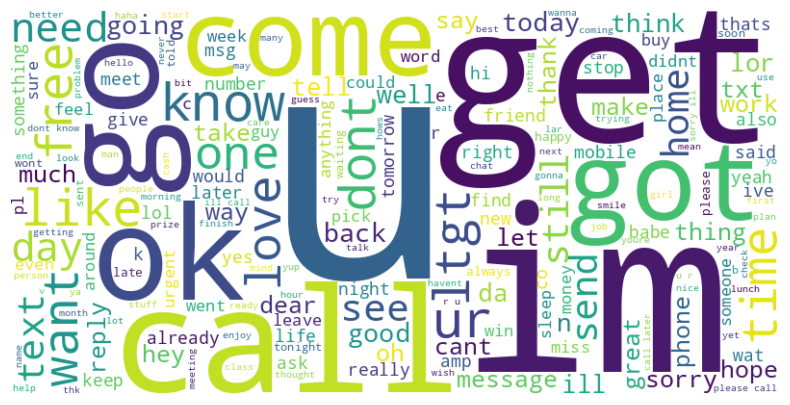

In [ ]:
# Creamos la wordcloud removiendo stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stop_words).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Wordcloud removiendo stopwords de mensajes que no son spam

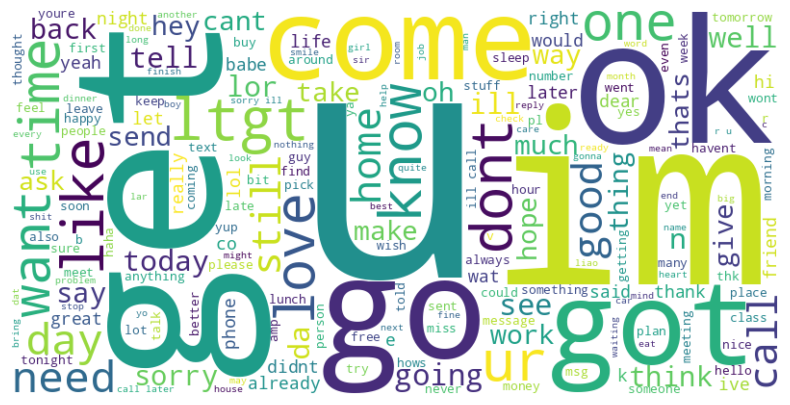

In [ ]:
# Filtrar el DataFrame para solo incluir filas con sentimiento positivo
df_nospam = df[df['Category'] == 'ham']

# Unir el texto de la columna 'review_es_clean' de los valores positivos
text_nospam = ' '.join(df_nospam['Email Text_puntuacion'])

# Crear la wordcloud para los comentarios positivos
wordcloud_nospam = WordCloud(width=800, height=400, background_color='white',
                                stopwords=stop_words).generate(text_nospam)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nospam, interpolation='bilinear')
plt.axis('off')
plt.show()

# Wordcloud removiendo stopwords de spam

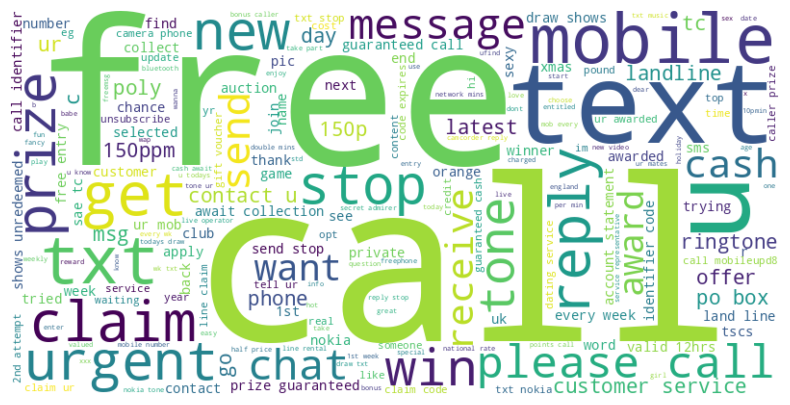

In [ ]:
# Filtrar el DataFrame para solo incluir filas con sentimiento positivo
df_spam = df[df['Category'] == 'spam']

# Unir el texto de la columna 'review_es_clean' de los valores positivos
text_spam = ' '.join(df_spam['Email Text_puntuacion'])

# Crear la wordcloud para los comentarios positivos
wordcloud_spam = WordCloud(width=800, height=400, background_color='white',
                                stopwords=stop_words).generate(text_spam)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.show()

# Wordcloud con Bigramas por categoría de review

In [ ]:
import pandas as pd  # Para manipulación y análisis de datos en estructuras tipo DataFrame
import re  # Para trabajar con expresiones regulares (limpieza y búsqueda en texto)
from sklearn.feature_extraction.text import CountVectorizer  # Para convertir texto en vectores de frecuencia (bolsa de palabras)
from wordcloud import WordCloud  # Para generar nubes de palabras a partir de texto
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
from nltk.corpus import stopwords  # Para acceder a listas de palabras vacías (stopwords) en distintos idiomas
import nltk  # Biblioteca para procesamiento de lenguaje natural (descarga y uso de recursos como stopwords)
!pip install -q gdown  # Comando para instalar la librería gdown (descargar archivos de Google Drive)
import gdown  # Para descargar archivos directamente desde Google Drive usando el ID del archivo
nltk.download('stopwords')  # Descarga las stopwords desde NLTK
stop_words = list(set(stopwords.words('english')))  # Obtiene y convierte a lista las stopwords en español


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


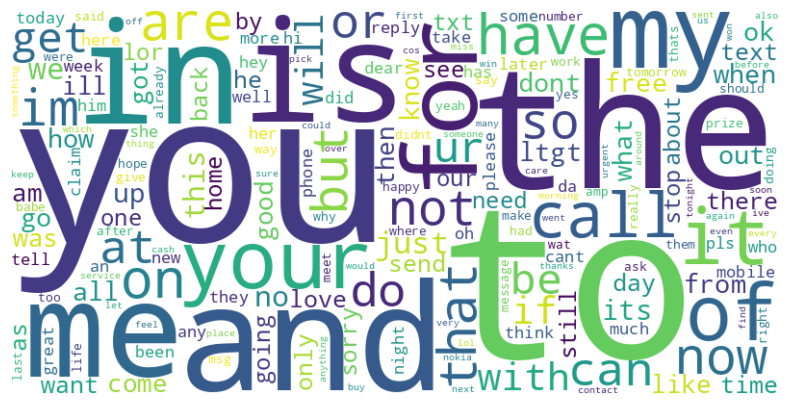

In [ ]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(1,1))

# Transformar el texto de la columna 'descripción' en n-gramas
X = vectorizer.fit_transform(df['Email Text_puntuacion'])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

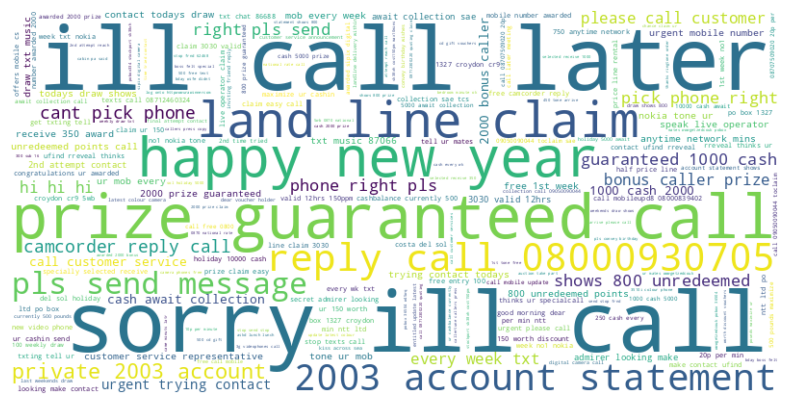

In [ ]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words = stop_words)

# Transformar el texto de la columna 'descripción' en n-gramas
X = vectorizer.fit_transform(df['Email Text_puntuacion'])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Convertimos el diccionario en df
df_n_grams_freq = pd.DataFrame(list(n_grams_freq.items()), columns=['Término', 'Frecuencia'])


In [ ]:
# Ordenamos el df
dfgrams = df_n_grams_freq.sort_values(by='Frecuencia', ascending=False)

In [ ]:
# Visualizamos los primeros 20 ngramas con mayor frecuencia.
dfgrams.head(20)

,Término,Frecuencia
13299,ill call later,42
24747,sorry ill call,38
21511,prize guaranteed call,21
11960,happy new year,18
14951,land line claim,14
22358,reply call 08000930705,14
515,2003 account statement,13
21482,private 2003 account,13
21090,pls send message,13
20640,phone right pls,12


In [ ]:

print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 38150 stored elements and shape (5572, 31476)>
  Coords	Values
  (0, 10624)	1
  (0, 14393)	1
  (0, 21189)	1
  (0, 6052)	1
  (0, 2498)	1
  (0, 3775)	1
  (0, 11526)	1
  (0, 30615)	1
  (0, 14916)	1
  (0, 3771)	1
  (0, 5038)	1
  (0, 11200)	1
  (1, 19662)	1
  (1, 15001)	1
  (1, 14348)	1
  (2, 9444)	1
  (2, 8220)	1
  (2, 30373)	1
  (2, 5556)	1
  (2, 30199)	1
  (2, 8603)	1
  (2, 6148)	1
  (2, 8941)	1
  (2, 27315)	1
  (2, 535)	1
  :	:
  (5567, 21500)	1
  (5567, 5084)	1
  (5567, 306)	1
  (5567, 20494)	1
  (5567, 7880)	1
  (5567, 3992)	1
  (5567, 129)	1
  (5567, 19272)	1
  (5568, 10831)	1
  (5568, 8258)	1
  (5569, 20802)	1
  (5569, 18036)	1
  (5570, 11667)	1
  (5570, 3318)	1
  (5570, 1279)	1
  (5570, 15651)	1
  (5570, 13211)	1
  (5570, 14007)	1
  (5570, 3900)	1
  (5570, 24599)	1
  (5570, 8025)	1
  (5570, 18945)	1
  (5570, 29729)	1
  (5570, 9940)	1
  (5571, 22659)	1


#Bag of Words (BoW)

In [ ]:
# Importamos la librería
from sklearn.feature_extraction.text import CountVectorizer

# Unimos los tokens de cada email en una sola cadena de texto.
# Usamos la columna 'Email Text_tokenizado_sin_stopwords' que ya está limpia.
df['Email Text_clean'] = df['Email Text_tokenizado_sin_stopwords'].apply(lambda x: ' '.join(x))

# Creamos el objeto CountVectorizer para el modelo Bag of Words.
# No es necesario especificar 'stop_words' porque ya las eliminamos.
count_vectorizer = CountVectorizer()

# Ajustamos y transformamos los datos. Esto crea la matriz de Bag of Words.
X_bow = count_vectorizer.fit_transform(df['Email Text_clean'])

# Creamos un DataFrame para visualizar mejor el resultado.
# Esto puede ser una matriz muy grande, por lo que mostramos solo un fragmento.
df_bow = pd.DataFrame(X_bow.toarray(), columns=count_vectorizer.get_feature_names_out())

# Mostramos el shape del DataFrame y las primeras 5 filas
print("Shape de la matriz Bag of Words:", X_bow.shape)
print("\nMatriz Bag of Words (primeras 5 filas):")
print(df_bow.head())

Shape de la matriz Bag of Words: (5572, 9314)

Matriz Bag of Words (primeras 5 filas):
   008704050406  0089my  0121  01223585236  01223585334  0125698789  02  \
0             0       0     0            0            0           0   0   
1             0       0     0            0            0           0   0   
2             0       0     0            0            0           0   0   
3             0       0     0            0            0           0   0   
4             0       0     0            0            0           0   0   

   020603  0207  02070836089  ...  zebra  zed  zeros  zhong  zindgi  zoe  \
0       0     0            0  ...      0    0      0      0       0    0   
1       0     0            0  ...      0    0      0      0       0    0   
2       0     0            0  ...      0    0      0      0       0    0   
3       0     0            0  ...      0    0      0      0       0    0   
4       0     0            0  ...      0    0      0      0       0    0   

   zo

# TF-IDF

In [ ]:
# Importamos la librería
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el objeto TfidfVectorizer.
# Scikit-learn gestiona la tokenización, conteo y cálculo de TF-IDF.
tfidf_vectorizer = TfidfVectorizer()

# Ajustamos y transformamos los datos. Esto crea la matriz TF-IDF.
X_tfidf = tfidf_vectorizer.fit_transform(df['Email Text_clean'])

# Creamos un DataFrame para visualizar el resultado.
# Convertimos la matriz dispersa a un array denso y le asignamos las columnas.
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostramos el shape del DataFrame y las primeras 5 filas
print("Shape de la matriz TF-IDF:", X_tfidf.shape)
print("\nMatriz TF-IDF (primeras 5 filas):")
print(df_tfidf.head())

Shape de la matriz TF-IDF: (5572, 9314)

Matriz TF-IDF (primeras 5 filas):
   008704050406  0089my  0121  01223585236  01223585334  0125698789   02  \
0           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
1           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
2           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
3           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
4           0.0     0.0   0.0          0.0          0.0         0.0  0.0   

   020603  0207  02070836089  ...  zebra  zed  zeros  zhong  zindgi  zoe  \
0     0.0   0.0          0.0  ...    0.0  0.0    0.0    0.0     0.0  0.0   
1     0.0   0.0          0.0  ...    0.0  0.0    0.0    0.0     0.0  0.0   
2     0.0   0.0          0.0  ...    0.0  0.0    0.0    0.0     0.0  0.0   
3     0.0   0.0          0.0  ...    0.0  0.0    0.0    0.0     0.0  0.0   
4     0.0   0.0          0.0  ...    0.0  0.0    0.0    0.0     0.0  0.0   

   zogtoriu

# Modelo de clasificación

In [ ]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Usamos la matriz TF-IDF como nuestras características (X)
X = X_tfidf

# Usamos la columna 'Category' como nuestras etiquetas (y)
y = df['Category']

# Dividimos los datos en conjuntos de entrenamiento y prueba
# 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape del conjunto de entrenamiento (X): {X_train.shape}")
print(f"Shape del conjunto de prueba (X): {X_test.shape}")

Shape del conjunto de entrenamiento (X): (4457, 9314)
Shape del conjunto de prueba (X): (1115, 9314)


In [ ]:
# Inicializamos el clasificador SVC
svc = SVC(kernel='linear', C=1.0, random_state=42)
# 'kernel' es la función que transforma los datos; 'linear' es una buena opción para texto.
# 'C' es un parámetro de regularización; un valor de 1.0 es un buen punto de partida.

# Entrenamos el modelo con los datos de entrenamiento
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Reporte de Clasificación:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.84      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.98      0.98      1115

Matriz de Confusión:
[[962   3]
 [ 24 126]]


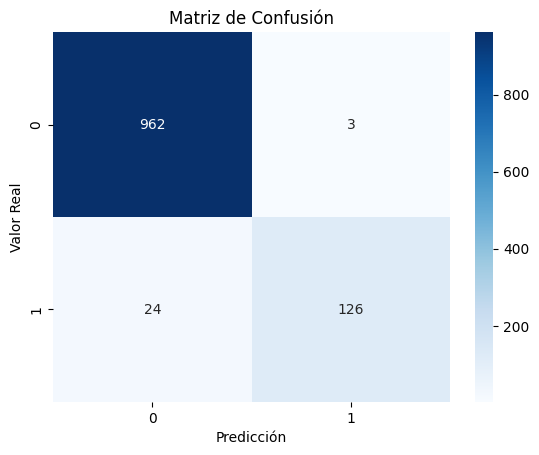

Precisión (Accuracy):
0.9757847533632287


In [ ]:
# Realizamos predicciones sobre el conjunto de prueba
y_pred = svc.predict(X_test)

# Evaluamos el rendimiento del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

print("Precisión (Accuracy):")
print(accuracy_score(y_test, y_pred))